# <center> Линейная алгебра в контексте линейных методов. Практика.

## <center> Прогнозирование выработки газа на скважинах.

## Постановка задачи

У Василия, основателя компании «Газ-Таз-Ваз-Нефть», дела идут в гору: у него уже функционирует 200 скважин для добычи газа. В этом году он открывает 30 новых скважин. Однако в целях оптимизации расходов и повышения дохода Василию необходимо оценить, сколько денег будет приносить ему каждая из скважин, а также понять, какие факторы (параметры скважин) потенциально сильнее всего повлияют на объём добычи газа. Для этого Василий решил нанять вас как специалиста в области Data Science.

Василий представляет вам набор данных о добыче газа на своих скважинах. Файл с данными вы можете скачать на платформе.

**Признаки в данных:**

* Well — идентификатор скважины;
* Por — пористость скважины (%);
* Perm — проницаемость скважины;
* AI — акустический импеданс ($кг/м^2 * 10^6$);
* Brittle — коэффициент хрупкости скважины (%);
* TOC — общий органический углерод (%);
* VR — коэффициент отражения витринита (%);
* Prod — добыча газа в сутки (млн. кубических футов).

**Ваша задача** — построить регрессионную модель, которая прогнозирует выработку газа на скважине (целевой признак — Prod) на основе остальных характеристик скважины, и проинтерпретировать результаты вашей модели.

Разделим задачу на две части:
* В первой мы построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.
* Во второй мы займёмся построением модели полиномиальной регрессии с регуляризацией и посмотрим на итоговые результаты моделирования.


Импортируем необходимые библиотеки:

In [1]:
# Импорт библиотек
import numpy as np # для работы с массивами
import pandas as pd # для работы с DataFrame 
import seaborn as sns # библиотека для визуализации статистических данных
import matplotlib.pyplot as plt # для построения графиков

%matplotlib inline

Прочитаем исходные данные:

In [2]:
df = pd.read_csv('./unconv.csv')
df.head()

,Well,Por,Perm,AI,Brittle,TOC,VR,Prod
0,1,12.08,2.92,2.80,81.40,1.16,2.31,4165.196191
1,2,12.38,3.53,3.22,46.17,0.89,1.88,3561.146205
2,3,14.02,2.59,4.01,72.80,0.89,2.72,4284.348574
3,4,17.67,6.75,2.63,39.81,1.08,1.88,5098.680869
4,5,17.52,4.57,3.18,10.94,1.51,1.90,3406.132832


## Практика: линейная регрессия по методу наименьших квадратов

Для начала построим простейшую модель линейной регрессии, проанализируем результаты её работы и выберем наиболее значимые факторы для прогнозирования.

В первой части вам предстоит выполнить задания 5.0–5.6. Максимальное количество баллов, которое можно получить, — 9.

### Задание 5.0. (не оценивается)

Проведите небольшой разведывательный анализ, чтобы поближе познакомиться с исходными данными. Постройте несколько визуализаций, которые помогут вам понять, как устроены исходные признаки, а также смогут продемонстрировать взаимосвязь факторов. 

Сделайте промежуточные выводы из проведённого разведывательного анализа.

Типы данных:
Well         int64
Por        float64
Perm       float64
AI         float64
Brittle    float64
TOC        float64
VR         float64
Prod       float64
dtype: object

Общая информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Well     200 non-null    int64  
 1   Por      200 non-null    float64
 2   Perm     200 non-null    float64
 3   AI       200 non-null    float64
 4   Brittle  200 non-null    float64
 5   TOC      200 non-null    float64
 6   VR       200 non-null    float64
 7   Prod     200 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 12.6 KB
None

Гистограммы распределения количественных признаков:


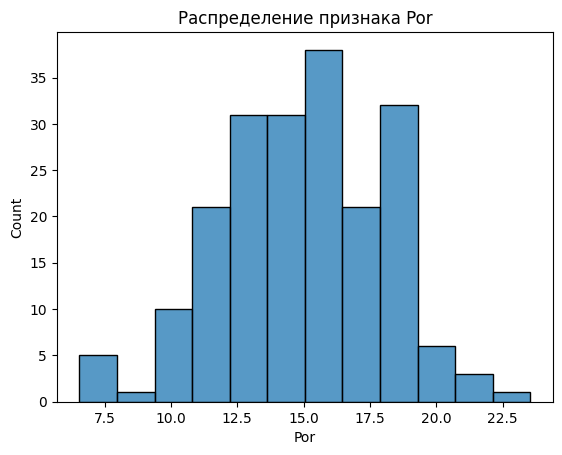

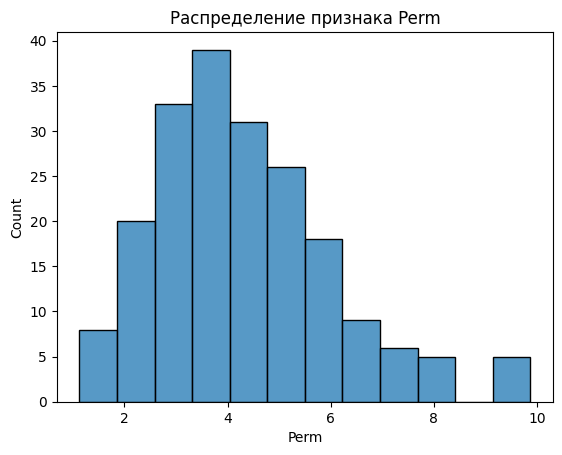

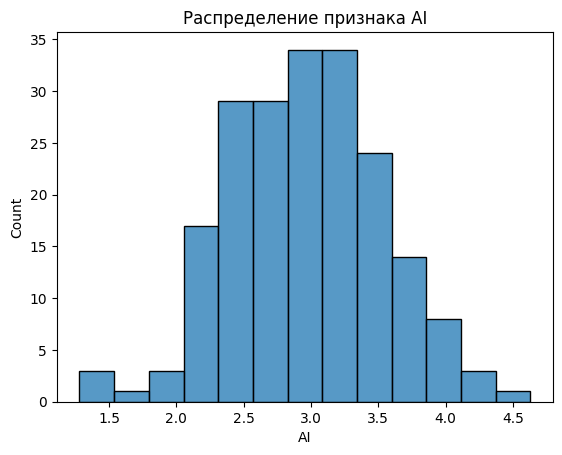

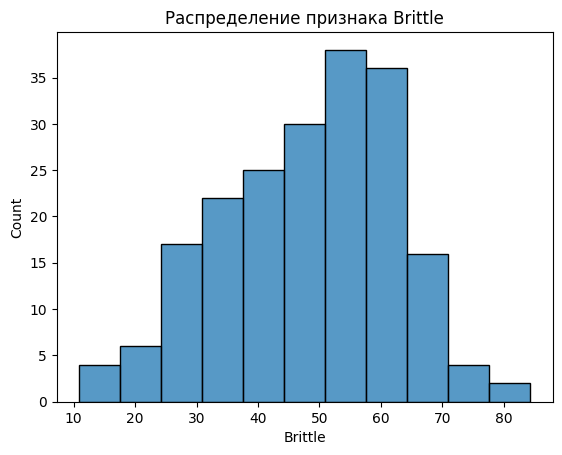

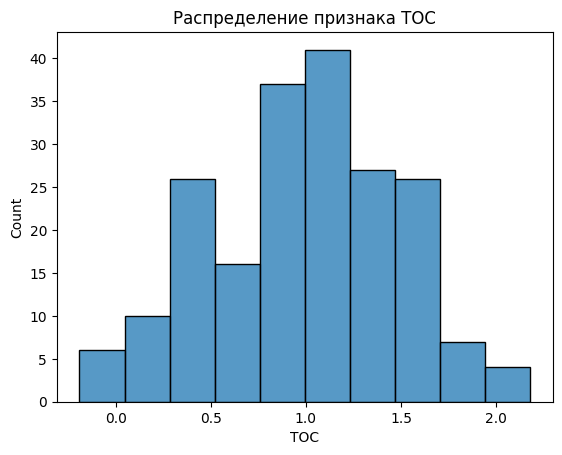

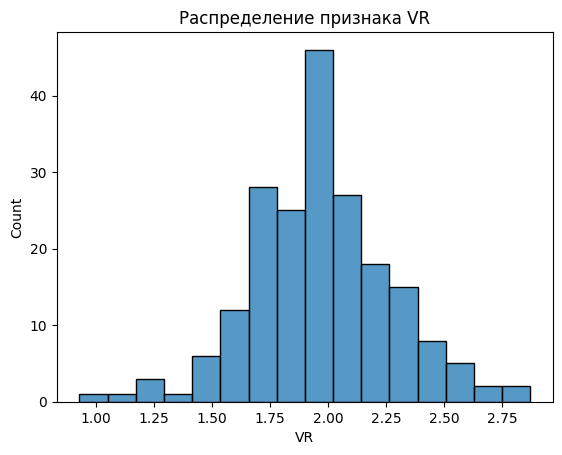

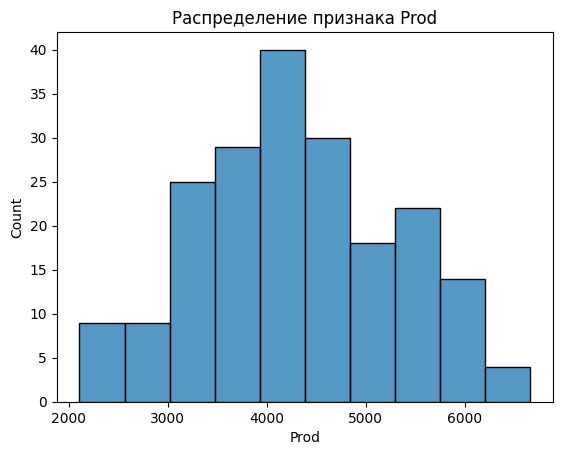

In [3]:
# Ваш код здесь
# Выводим общую информацию об исходных данных
print('Типы данных:')
print(df.dtypes)
print()
print('Общая информация:')
print(df.info())
print()

# Выводим гистограммы распределения количественных признаков
print('Гистограммы распределения количественных признаков:')
for col in df.columns[1:]:
    sns.histplot(data=df[col])
    plt.title(f'Распределение признака {col}')
    plt.show()

### Задание 5.1. (2 балла)

Постройте корреляционную матрицу факторов, включив в неё целевой признак. 

Для наглядности визуализируйте полученную матрицу с помощью тепловой карты. 

**Примечание.** *Для визуализации вы можете использовать любую из знакомых вам библиотек.*

На основе построенной корреляционной матрицы ответьте на следующий вопрос:

* Какие факторы сильнее всего коррелируют с целевой переменной?

Вычислите ранг и определитель полученной матрицы корреляций и приведите развёрнутые ответы на следующие вопросы:
* Является ли корреляционная матрица плохо обусловенной (близок ли её опредитель к нулю)?
* Что вы можете сказать о наличии коллинераности/мультиколлинеарности в данных? 
* Применима ли в данном случае модель классической линейной регрессии по методу наименьших квадратов и почему? 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для расчёта корреляционной матрицы;
    * приведён код для визуализации корреляционной матрицы в виде тепловой карты;
    * рассчитаны ранг и определитель корреляционной матрицы;
    * предоставлены обоснованные ответы на все поставленные вопросы. 

- Задание выполнено верно, но не учтено одно условие (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

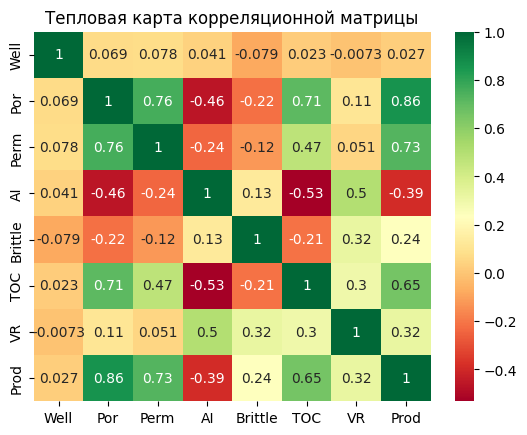


Ранг корреляционной матрицы: 8
Определитель корреляционной матрицы 0.0007299388072652095

Сильнее всего с целевой переменной Prod коррелируют следующие факторы:
Por     0.861910
Perm    0.727426
TOC     0.654445


In [4]:
# Ваш код здесь
# Рассчитываем корреляционную матрицу
df_corr = df.corr()

# Визуализируем полученную матрицу с помощью тепловой карты
sns.heatmap(df_corr, annot=True, cmap='RdYlGn')
plt.title('Тепловая карта корреляционной матрицы')
plt.show()
print()

# Рассчитываем ранг и определитель корреляционной матрицы
corr = np.array(df_corr.values)
corr_rank = np.linalg.matrix_rank(corr)
corr_det = np.linalg.det(corr)
print(f'Ранг корреляционной матрицы: {corr_rank}')
print(f'Определитель корреляционной матрицы {corr_det}')
print()

# Определяем факторы, которые сильнее всего коррелируют с целевой переменной Prod
top_corr_fact = df_corr['Prod'].drop('Prod').sort_values(ascending=False).head(3)
print('Сильнее всего с целевой переменной Prod коррелируют следующие факторы:')
print(top_corr_fact.to_string())

> *Ваши выводы здесь*  
> Определитель корреляционной матрицы очень мал (~0.0007), матрица практически вырожденная, что позволяет говорить о том, что данная корреляционная матрица является плохо обсуловленной.  
> Данная корреляционная матрица имеет факторы, которые сильно коррелируют друг с другом, а также очень близкий к нулю определитель, что свидетельствует о мультиколлинеарности в данных.  
> Модель классической линейной регресии по МНК может быть применена в данном случае, однако интерпретация параметров регрессии усложняется, коэффициенты линейной регрессии становятся неустойчивыми.

### Задание 5.2. (2 балла)

Создайте матрицу наблюдений `X` и вектор правильных ответов `y`. В качестве факторов для матрицы наблюдений возьмите все имеющиеся в данных признаки. 

Постройте модель линейной регрессии по методу наименьших квадратов. Для этого воспользуйтесь матричной формулой МНК и инструментарием библиотеки numpy. 

Выведите на экран полученные оценки коэффициентов модели, округлённые до целого.

Приведите подробные выводы по полученным результатам, ответив на следующие вопросы:
* Есть ли в ваших данных признаки, которые, согласно модели, можно назвать неинформативными, то есть они не оказывают влияния на целевую переменную или оказывают шумовое влияние?
* Приведите интерпретацию нескольких (двух или трёх) коэффициентов полученной модели линейной регрессии.


**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * приведён код для нахождения параметров модели линейной регрессии с помощью матричной формулы МНК;
    * на основе полученных параметров даны верные ответы на поставленные вопросы;
    * приведена корректная интерпретация нескольких коэффициентов полученной модели линейной регрессии.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [5]:
# Ваш код здесь
# Создаем матрицу наблюдений (факторов) X и вектор правильных ответов (целевую переменную) y
X = np.column_stack((np.ones(200),np.array(df.drop(['Well','Prod'], axis=1).values)))  
y = np.array(df['Prod'])

# Вычисляем МНК-оценку для коэффициентов модели
G1_X = np.linalg.inv(np.dot(X.T, X))
b = np.dot(X.T, y)
w = np.dot(G1_X, b)

# Выводим полученные оценки коэффициентов модели, округленные до целого
W = np.column_stack((df.drop(['Well','Prod'], axis=1).columns.to_list(), [int(i) for i in np.round(w[1:])]))
print('МНК-оценка коэффициентов модели:')
for pair in W:
    print(f'{pair[0]}: {pair[1]}')

МНК-оценка коэффициентов модели:
Por: 230
Perm: 116
AI: -364
Brittle: 25
TOC: -77
VR: 783


> *Ваши выводы здесь*  
> Признак Brittle можно назвать неинформативным, так как он оказывает минимальное влияние на целевую переменную.  
> **Увеличение** признака Por на 1 единицу приведет к **увеличению** целевой переменной Prod на 783 пункта,  
> **Уменьшение** признака Perm на 1 единицу приведет к **уменьшению** целевой переменной Prod на 116 пунктов,  
> **Увеличение** признака AI на 1 единицу приведет к **уменьшению** целевой переменной Prod на 364 пункта.

### Задание 5.3. (1 балл)

Теперь потренируемся строить предсказание для наблюдений целевой переменной. 

**а)** Постройте прогноз выработки газа для скважины со следующими параметрами:

```python
{
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
 }
```

Рассчитайте абсолютную ошибку построенного вами прогноза для предложенной скважины (в миллионах кубических футов в день), если известно, что на этой скважине производится `4748.315024` миллионов кубических футов газа в день. 

**б)** Постройте прогноз выработки газа для всех скважин из обучающего набора данных. Выберите метрику, по которой вы будете оценивать качество регрессионных моделей и сравнивать их между собой (можно использовать несколько метрик, но не более двух).

Рассчитайте значение выбранной метрики для вашей модели. Приведите интерпретацию полученного результата. 

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**1 балл**): 
    * приведён код для построения прогноза выработки газа на указанной скважине и рассчитана абсолютная ошибка прогноза для этой скважины;
    * выбрана корректная для поставленной задачи метрика (или метрики) оценки качества модели и приведён код для расчёта этой метрики на всём обучающем наборе данных;
    * приведена корректная интерпретация полученного результата.

- Задание выполнено верно, но не учтено одно из условий, или задание выполнено неверно (**0 баллов**).

In [6]:
# Ваш код здесь
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error

# Данные для новой скважины
new_dict = {
    'Well': 106.0,
    'Por': 15.32,
    'Perm': 3.71,
    'AI': 3.29,
    'Brittle': 55.99,
    'TOC': 1.35,
    'VR': 2.42
 }

# Приводим данные в необходимый вид
new_list = []
for i in new_dict.values():
    new_list.append(i)
new = np.array(new_list)
new[0] = 1

# Вычисляем прогноз целевой переменной для новой скважины,
# а также абсолютную ошибку прогноза
new_prod = np.dot(new, w)
correct_prod = 4748.315024
abs_error = abs(new_prod - correct_prod)
print('Скважина с заданными параметрами:')
print(f'Прогноз выработки газа скважиной с заданными параметрами равен {new_prod} млн куб. футов/день')
print(f'Абсолютная ошибка прогноза равна {abs_error} млн куб. футов/день')
print()

# Вычисляем прогноз целевой переменной для всех скважин из обучающего набора данных
new_y = np.dot(X, w)

# Рассчитаем метрики MAPE и MAE для оценки качества модели
mape = mean_absolute_percentage_error(y, new_y)*100
mae = mean_absolute_error(y, new_y)
print('Все скважины из обучающего набора данных:')
print(f'Средняя абсолютная процентная ошибка (MAPE) равна {mape:.2f}%')
print(f'Средняя абсолютная ошибка (MAE) равна {mae} млн куб. футов/день')

Скважина с заданными параметрами:
Прогноз выработки газа скважиной с заданными параметрами равен 4722.72153830062 млн куб. футов/день
Абсолютная ошибка прогноза равна 25.593485699380835 млн куб. футов/день

Все скважины из обучающего набора данных:
Средняя абсолютная процентная ошибка (MAPE) равна 3.63%
Средняя абсолютная ошибка (MAE) равна 153.60366973556467 млн куб. футов/день


> *Ваши выводы здесь*  
> Интерпретация полученных результатов:  
> В среднем полученная регрессионная модель ошибается в расчете целевой переменной на 3.63%  
> В среднем полученная регрессионная модель ошибается в расчете выработки газа на 153.60366973556467 млн куб. футов/день  

### Задание 5.4. (1 балл)

Настало время анализа построенной модели. Посмотрите на коэффициенты и сравните их знаки со значениями выборочных корреляций между целевым признаком и факторами, которые вы нашли ранее.

Дайте развёрнутые ответы на следующие вопросы:

* Есть ли в вашей модели фактор, при котором коэффициент в модели линейной регрессии противоречит соответствующему коэффициенту корреляции? Например, корреляция говорит, что зависимость между фактором и целевой переменной прямая, а модель говорит обратное. Если таких факторов несколько, укажите их все.
* Как вы считаете, с чем связано полученное противоречие результатов?

**Критерии оценивания:**

- Задание выполнено верно, даны корректные развёрнутые ответы на все поставленные в задании вопросы (**1 балл**). 

- Задание выполнено неверно, даны некорректные ответы на один или несколько поставленных в задании вопросов (**0 баллов**).

In [7]:
# Ваш код здесь
# Подготавливаем данные для сравенения
df_correlation = df.drop('Well', axis=1).corr()['Prod'].drop('Prod')
metrics_name = list(df_correlation.index)
metrics_correlation = list(df_correlation.values)
metrics_coef = list(w[1:])

# Создаем сравнительную таблицу
compare_table = pd.DataFrame({
    'Метрика:': metrics_name,
    'Коэффиициент корреляции:': metrics_correlation,
    'Коэффициент регрессии:': metrics_coef
    })

print(compare_table.T.to_string(index=True, header=False))

Метрика:                        Por        Perm          AI   Brittle        TOC          VR
Коэффиициент корреляции:    0.86191    0.727426   -0.390835  0.237155   0.654445    0.323182
Коэффициент регрессии:    230.29581  116.228033 -363.736086  24.99667 -77.436742  783.187413


> *Ваши выводы здесь*  
> В модели присутствует фактор TOC, коэффициент корреляции которого ≈ 0.65, что указывает на прямую зависимость, однако коэффициент регрессии для данного фактора ≈ -77.44, что в свою очередь указывает на обратную зависимость.  
> Полученное противоречие результатов может указывать на наличие нелинейной зависимости между фактором TOC и целевой переменной Prod.

### Задание 5.5. (2 балла)

* Исключите из данных сильно коррелированные между собой факторы. Под сильной корреляцией в данной задаче будем понимать значения выше `0.7`.

Выбирая, какой из коррелированных факторов оставить, руководствуйтесь коэффициентом корреляции с целевой переменной: оставляйте тот фактор, который больше всего коррелирует с целевой переменной (объёмом добычи газа).

* Также исключите из данных факторы, для которых корреляция с целевой переменной меньше `0.05`.

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого используйте матричную формулу и библиотеку numpy. Выведите значение полученных коэффициентов, округлённых до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте выбранную вами ранее метрику (или метрики). 

Дайте подробные ответы на следующие вопросы:

* Приведите интерпретацию нескольких полученных коэффициентов (двух или трёх). Сравните их значения с полученными ранее.
* Приведите интерпретацию полученных значений метрик. Сравните их значения с полученными ранее. 
* Удалось ли вам побороть противоречие коэффициентов линейной регрессии и коэффициентов корреляции?

**Критерии оценивания:**
- Задание выполнено верно, учтены все условия (**2 балла**): 
    * отобраны верные факторы;
    * на основе отобранных факторов построена модель линейной регрессии с помощью матричной формулы МНК и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * даны ответы на все поставленные в задании вопросы.

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено верно, не учтено несколько из условий (**0 баллов**).

In [8]:
# Ваш код здесь
# Создаем матрицу корреляций количественных признаков
df_corr_fact = df_corr.drop('Well', axis=1).drop('Well')    # df_corr рассчитано на шаге 5.1

# Фильтруем факторы, корреляция которых с целевой переменной меньше 0.05
# либо корреляция факторов между друг другом больше 0.7 (оставляем 
# тот фактор, который больше всего коррелирует с целевой переменной)
df_corr_fact = df_corr_fact.query('abs(Prod) > 0.05')

strong_corr_fact = set()

for ind in df_corr_fact.index:
    if ind == 'Prod':
        continue
    for colmn in df_corr_fact.columns:
        if ind == colmn:
            continue
        elif abs(df_corr_fact.loc[ind, colmn]) > 0.7    \
             and ind not in strong_corr_fact            \
             and ind != top_corr_fact.index[0]:         # top_corr_fact рассчитано на шаге 5.1
            strong_corr_fact.add(ind)

columns_to_drop = list(strong_corr_fact)
columns_to_keep = list(df_corr_fact.drop(columns_to_drop, axis=1).drop('Prod', axis=1).columns)

# Создаем новую матрицу с оставшимися факторами
df_weak = df[columns_to_keep]

# Создаем матрицу наблюдений (факторов) и вектор правильных ответов (целевую переменную)
X_weak = np.column_stack((np.ones(200),np.array(df_weak.values)))  
y_weak = y    # y рассчитано на шаге 5.2

# Вычисляем МНК-оценку для коэффициентов новой модели
G1_X_weak = np.linalg.inv(np.dot(X_weak.T, X_weak))
b_weak = np.dot(X_weak.T, y_weak)
w_weak = np.dot(G1_X_weak, b_weak)

# Выводим полученные коэффициенты
print('МНК-оценка коэффициентов новой модели:')
for fact, coef in zip(columns_to_keep, np.round(w_weak[1:])):
    print(f'{fact}: {coef}')
print()

# Вычисляем прогноз целевой переменной для всех скважин из нового набора данных
new_y_weak = np.dot(X_weak, w_weak)

# Рассчитаем метрики MAPE и MAE для оценки качества новой модели
mape_weak = mean_absolute_percentage_error(y_weak, new_y_weak)*100
mae_weak = mean_absolute_error(y_weak, new_y_weak)
print('Метрики MAPE и MAE для оценки качества новой модели:')
print(f'Средняя абсолютная процентная ошибка (MAPE) равна {mape_weak:.2f}%')
print(f'Средняя абсолютная ошибка (MAE) равна {mae_weak} млн куб. футов/день')
print()

# Подготавливаем данные для сравенения коэффициентов регрессии и корреляции
df_weak_correlation = df.drop(columns_to_drop, axis=1).drop('Well', axis=1).corr()['Prod'].drop('Prod')
weak_metrics_name = list(df_weak_correlation.index)
weak_metrics_correlation = list(df_weak_correlation.values)
weak_metrics_coef = list(w_weak[1:])

# Создаем сравнительную таблицу
compare_weak_table = pd.DataFrame({
    'Метрика:': weak_metrics_name,
    'Коэффиициент корреляции:': weak_metrics_correlation,
    'Коэффициент регрессии:': weak_metrics_coef
    })
print('Сравенение коэффициентов регрессии и корреляции')
print(compare_weak_table.T.to_string(index=True, header=False))

МНК-оценка коэффициентов новой модели:
Por: 293.0
AI: -200.0
Brittle: 28.0
VR: 517.0

Метрики MAPE и MAE для оценки качества новой модели:
Средняя абсолютная процентная ошибка (MAPE) равна 4.04%
Средняя абсолютная ошибка (MAE) равна 171.43146059580926 млн куб. футов/день

Сравенение коэффициентов регрессии и корреляции
Метрика:                         Por          AI    Brittle          VR
Коэффиициент корреляции:     0.86191   -0.390835   0.237155    0.323182
Коэффициент регрессии:    293.036246 -200.030912  27.640982  517.402726


> *Ваши выводы здесь*  
> Интерпретация полученных коэффициентов:  
> **Увеличение** признака Por на 1 единицу приведет к **увеличению** целевой переменной Prod на 293 пункта,  
> **Уменьшение** признака VR на 1 единицу приведет к **уменьшению** целевой переменной Prod на 517 пунктов,  
> **Увеличение** признака AI на 1 единицу приведет к **уменьшению** целевой переменной Prod на 200 пунктов.
> 
> Интерпретация полученных метрик:  
> В среднем новая регрессионная модель ошибается в расчете целевой переменной на 4.04% против 3.63% у старой модели.  
> В среднем новая регрессионная модель ошибается в расчете выработки газа на ≈171 млн куб. футов/день против ≈154 млн куб. футов/день у старой модели.
>
> В новой модели коэффициенты линейной регрессии не противоречат коэффициентам корреляции.  

### Задание 5.6. (1 балл)

Наконец, давайте построим модель линейной регрессии из библиотеки `scikit-learn (sklearn)` и сравним результаты её работы с теми, что нам удалось получить вручную. 

Постройте модель линейной регрессии на обновлённых после удаления факторов данных по методу наименьших квадратов. Для этого воспользуйтесь классом `LinearRegression` из библиотеки `sklearn`. Выведите значения полученных коэффициентов, округлённые до целого.

Сделайте прогноз для всего обучающего набора данных и рассчитайте значение выбранной вами метрики (или метрик).

Сравните результаты библиотечной реализации с тем, что вы получили ранее. 

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов построена модель линейной регрессии из библиотеки sklearn и найдены параметры модели, соответствующие каждому из факторов;
    * построен прогноз для всего обучающего набора данных и рассчитано значение метрики (метрика должна быть выбрана корректно);
    * приведён вывод о соответствии результатов, полученных вручную и с помощью библиотеки.
- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [9]:
# Ваш код здесь
from sklearn.linear_model import LinearRegression

# Создаем матрицу наблюдений (факторов) и вектор правильных ответов (целевую переменную)
X_sk = df[columns_to_keep]
y_sk = df['Prod']

# Создаём модель линейной регрессии
model = LinearRegression()

# Вычисляем коэффициенты регрессии
model.fit(X_sk, y_sk)
w_sk = model.coef_

# Выводим полученные коэффициенты
print('МНК-оценка коэффициентов sklearn-модели:')
for fact, coef in zip(X_sk.columns, np.round(w_sk)):
    print(f'{fact}: {coef}')
print()

# Вычисляем прогноз целевой переменной
y_new_sk = model.predict(X_sk)

# Рассчитаем метрики MAPE и MAE для оценки качества sklearn-модели
mape_sk = mean_absolute_percentage_error(y_sk, y_new_sk)*100
mae_sk = mean_absolute_error(y_sk, y_new_sk)
print('Метрики MAPE и MAE для оценки качества sklearn-модели:')
print(f'Средняя абсолютная процентная ошибка (MAPE) равна {mape_sk:.2f}%')
print(f'Средняя абсолютная ошибка (MAE) равна {mae_sk} млн куб. футов/день')
print()

print('Сравнение с метриками, полученными ранее:')
print('\tsklearn\tnumpy')
print(f'MAPE:\t{mape_sk:.2f}\t{mape_weak:.2f}')
print(f'MAE:\t{mae_sk:.2f}\t{mae_weak:.2f}')

МНК-оценка коэффициентов sklearn-модели:
Por: 293.0
AI: -200.0
Brittle: 28.0
VR: 517.0

Метрики MAPE и MAE для оценки качества sklearn-модели:
Средняя абсолютная процентная ошибка (MAPE) равна 4.04%
Средняя абсолютная ошибка (MAE) равна 171.43146059580795 млн куб. футов/день

Сравнение с метриками, полученными ранее:
	sklearn	numpy
MAPE:	4.04	4.04
MAE:	171.43	171.43


> *Ваши выводы здесь*  
> Результаты прогнозирования целевой переменной Prod, а также метрики качества совпадают как при ручном построении модели с помощью инструментов numpy, так и при использовании библиотеки sklearn.

## Практика: полиномиальная регрессия и регуляризация

Мы продолжаем работать над задачей от владельца компании «Газ-Таз-Ваз-Нефть» Василия.

Ранее мы построили модель линейной регрессии, которая прогнозирует выработку газа на скважине. Для этого мы с помощью матрицы корреляций и рассуждений отобрали некоррелированные, значимые для предсказания признаки. **Далее мы будем использовать именно их (см. задание 5.5).**

Мы хотим улучшить результат — уменьшить ошибку прогноза. Для этого мы воспользуемся моделью полиномиальной регрессии третьей степени. Однако теперь мы знаем, что полиномиальным моделям очень легко переобучиться под исходную выборку. Так как данных у нас не так много (всего 200 скважин), то для контроля качества модели мы будем использовать кросс-валидацию. 

Приступим! Выполните задания 8.1–8.5:


In [10]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

### Задание 8.1. (1 балл)

Стандаризируйте признаки с помощью `StandartScaler` из библиотеки `sklearn`. 

Затем сгенерируйте полиномиальные признаки третьего порядка на факторах, которые вы выбрали для обучения моделей. Для этого воспользуйтесь генератором полиномов `PolynomialFeatures` из библиотеки `sklearn`. Параметр `include_bias` установите в значение `False`.

Выведите на экран, сколько факторов у вас получилось после генерации полиномиальных признаков.

**Важно:** стандартизацию необходимо произвести до генерации полиномиальных факторов!

Обучите модель линейной регрессии из библиотеки `sklearn` (`LinearRegression`) на полученных полиномиальных факторах.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * на основе отобранных факторов сгенерированы полиномиальные признаки третьего порядка;
    * построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).
- Задание выполнено неверно, не учтено одно или несколько из условий (**0 баллов**).

In [11]:
# Ваш код здесь
# Создаем матрицу наблюдений (факторов) и вектор правильных ответов (целевую переменную)
X_for_poly = df[columns_to_keep]
y_for_poly = df['Prod']

# Инициализируем стандартизатор StandardScaler
scaler = StandardScaler()

# Подгоняем параметры стандартизатора
X_scal = scaler.fit_transform(X_for_poly)

# Добавляем полиномиальные признаки
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly.fit_transform(X_scal)

# Выводим количество факторов полученное после генерации полиномиальных признаков
print(f'Количество факторов: {X_poly.shape[1]}')

# Создаём модель линейной регрессии
model = LinearRegression()

# Оцениваем качество модели на кросс-валидации
cv_results = cross_validate(model, \
                            X_poly, \
                            y_for_poly, \
                            scoring=['neg_mean_absolute_percentage_error', 'neg_mean_absolute_error'], \
                            cv=5, \
                            return_train_score=True)
mape_poly_train = -cv_results['train_neg_mean_absolute_percentage_error'].mean() * 100
mape_poly_valid = -cv_results['test_neg_mean_absolute_percentage_error'].mean() * 100
mae_poly_train = -cv_results['train_neg_mean_absolute_error'].mean()
mae_poly_valid = -cv_results['test_neg_mean_absolute_error'].mean()
print(f'MAPE на тренировочных фолдах: {mape_poly_train:.2f} %')
print(f'MAPE на валидационных фолдах: {mape_poly_valid:.2f} %')
print(f'MAE на тренировочных фолдах: {mae_poly_train:.3f} млн куб. футов/день')
print(f'MAE на валидационных фолдах: {mae_poly_valid:.3f} млн куб. футов/день')

Количество факторов: 34
MAPE на тренировочных фолдах: 1.77 %
MAPE на валидационных фолдах: 2.68 %
MAE на тренировочных фолдах: 75.345 млн куб. футов/день
MAE на валидационных фолдах: 110.474 млн куб. футов/день


> *Ваши выводы здесь*  
> После добавления полиноминальных признаков третьего порядка, количество факторов в матрице увеличилось с 4 до 34, что позволило улучшить метрики оценки качества MAPE и MAE в ~2 раза.  
> При этом разница между метриками на тренировочных и валидационных наборах достигает примерно 1.5 раз, однако в количественном выражении это ~1% либо ~35 млн куб. футов/день, что свидетельствует о некритичном переобучении модели.  

### Задание 8.2. (2 балла)

Теперь попробуем воспользоваться линейной регрессией с регуляризацией. Для начала возьмём $L_1$-регуляризацию.

Обучите модель `Lasso` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Lasso), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [12]:
# Ваш код здесь
# Создаем матрицу наблюдений (факторов) и вектор правильных ответов (целевую переменную)
X_for_Lasso = df[columns_to_keep]
y_for_Lasso = df['Prod']

# Инициализируем стандартизатор StandardScaler
scaler = StandardScaler()

# Подгоняем параметры стандартизатора
X_scal_Lasso = scaler.fit_transform(X_for_Lasso)

# Добавляем полиномиальные признаки
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly_Lasso = poly.fit_transform(X_scal_Lasso)

# Определяем лучшее значение alpha с помощью GridSearchCV
alpha_range = [0.001, 0.01, 0.1, 1.0, 10.0]
param_grid = {'alpha': alpha_range}
grid_search = GridSearchCV(Lasso(max_iter=10000), \
                           param_grid, \
                           cv=5, \
                           scoring='neg_mean_absolute_error', \
                           n_jobs=16)
grid_search.fit(X_poly_Lasso, y_for_Lasso)
best_alpha_lasso = grid_search.best_params_['alpha']
print(f'Подобранное с помощью GridSearchCV значение alpha: {best_alpha_lasso}')

# Создаём модель регрессии c L1-регуляризацией
lasso = Lasso(alpha=best_alpha_lasso, max_iter=10000)

# Оцениваем качество модели на кросс-валидации
cv_results_lasso = cross_validate(lasso, \
                            X_poly_Lasso, \
                            y_for_Lasso, \
                            scoring=['neg_mean_absolute_percentage_error', 'neg_mean_absolute_error'], \
                            cv=5, \
                            return_train_score=True)
mape_lasso_train = -cv_results_lasso['train_neg_mean_absolute_percentage_error'].mean() * 100
mape_lasso_valid = -cv_results_lasso['test_neg_mean_absolute_percentage_error'].mean() * 100
mae_lasso_train = -cv_results_lasso['train_neg_mean_absolute_error'].mean()
mae_lasso_valid = -cv_results_lasso['test_neg_mean_absolute_error'].mean()
print(f'MAPE на тренировочных фолдах для Lasso: {mape_lasso_train:.2f} %')
print(f'MAPE на валидационных фолдах для Lasso: {mape_lasso_valid:.2f} %')
print(f'MAE на тренировочных фолдах для Lasso: {mae_lasso_train:.3f} млн куб. футов/день')
print(f'MAE на валидационных фолдах для Lasso: {mae_lasso_valid:.3f} млн куб. футов/день')

Подобранное с помощью GridSearchCV значение alpha: 10.0
MAPE на тренировочных фолдах для Lasso: 1.95 %
MAPE на валидационных фолдах для Lasso: 2.38 %
MAE на тренировочных фолдах для Lasso: 83.378 млн куб. футов/день
MAE на валидационных фолдах для Lasso: 99.992 млн куб. футов/день


> *Ваши выводы здесь*  
> Регуляризация с помощью Lasso позволила сократить разницу между оценочными метриками на тренировочных и валидационных наборах до ~0.4% или ~17 млн куб. футов/день.  
> Несмотря на то, что оценочные метрики на тренировочных наборах незначительно ухудшились (на ~0.17%), значения оценочных метрик на валидационных наборах наоборот стали лучше, что свидетельствует о некотором уменьшении переобучения.

### Задание 8.3. (2 балла)

Проделаем то же самое с $L_2$-регуляризацией.

Обучите модель `Ridge` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициент регуляризации (`alpha`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию оцените среднее значение выбранной вами метрики (или метрик) на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

In [13]:
# Ваш код здесь
# Создаем матрицу наблюдений (факторов) и вектор правильных ответов (целевую переменную)
X_for_Ridge = df[columns_to_keep]
y_for_Ridge = df['Prod']

# Инициализируем стандартизатор StandardScaler
scaler = StandardScaler()

# Подгоняем параметры стандартизатора
X_scal_Ridge = scaler.fit_transform(X_for_Ridge)

# Добавляем полиномиальные признаки
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly_Ridge = poly.fit_transform(X_scal_Ridge)

# Определяем лучшее значение alpha с помощью GridSearchCV
alpha_range = [0.001, 0.01, 0.1, 1.0, 10.0]
param_grid = {'alpha': alpha_range}
grid_search = GridSearchCV(Ridge(solver='auto'), \
                           param_grid, \
                           cv=5, \
                           scoring='neg_mean_absolute_error', \
                           n_jobs=16)
grid_search.fit(X_poly_Ridge, y_for_Ridge)
best_alpha_ridge = grid_search.best_params_['alpha']
print(f'Подобранное с помощью GridSearchCV значение alpha: {best_alpha_ridge}')

# Создаём модель регрессии c L2-регуляризацией
ridge = Ridge(alpha=best_alpha_ridge, solver='auto')

# Оцениваем качество модели на кросс-валидации
cv_results_ridge = cross_validate(ridge, \
                            X_poly_Ridge, \
                            y_for_Ridge, \
                            scoring=['neg_mean_absolute_percentage_error', 'neg_mean_absolute_error'], \
                            cv=5, \
                            return_train_score=True)
mape_ridge_train = -cv_results_ridge['train_neg_mean_absolute_percentage_error'].mean() * 100
mape_ridge_valid = -cv_results_ridge['test_neg_mean_absolute_percentage_error'].mean() * 100
mae_ridge_train = -cv_results_ridge['train_neg_mean_absolute_error'].mean()
mae_ridge_valid = -cv_results_ridge['test_neg_mean_absolute_error'].mean()
print(f'MAPE на тренировочных фолдах для Ridge: {mape_ridge_train:.2f} %')
print(f'MAPE на валидационных фолдах для Ridge: {mape_ridge_valid:.2f} %')
print(f'MAE на тренировочных фолдах для Ridge: {mae_ridge_train:.3f} млн куб. футов/день')
print(f'MAE на валидационных фолдах для Ridge: {mae_ridge_valid:.3f} млн куб. футов/день')

Подобранное с помощью GridSearchCV значение alpha: 0.1
MAPE на тренировочных фолдах для Ridge: 1.77 %
MAPE на валидационных фолдах для Ridge: 2.67 %
MAE на тренировочных фолдах для Ridge: 75.324 млн куб. футов/день
MAE на валидационных фолдах для Ridge: 110.138 млн куб. футов/день


> *Ваши выводы здесь*  
> Регуляризация с помощью Ridge практически не дала улучшения оценочных метрик по сравнению с обычной регрессией с учетом полиномиальных признаков третьего порядка. В сравнении же с Lasso, разницу между оценочными метриками на тренировочных и валидационных наборах увеличилась.  
> Из этого можем сделать вывод, что модель линейной регрессии уже достаточно хороша для данной задачи и добавление L2-регуляризации не дает никаких преимуществ.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (Ridge), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

### Задание 8.4. (2 балла)

Наконец, настало время комбинировать $L_1$ и $L_2$ -регуляризации.

Обучите модель `ElasticNet` из библиотеки `sklearn` на полученных полиномиальных факторах, предварительно стандартизировав факторы. 

Коэффициенты регуляризации (`alpha` и `l1-ratio`) подберите самостоятельно с помощью любого известного вам метода подбора гиперпаметров.

Используя кросс-валидацию, оцените среднее значение метрики MAPE на тренировочных и валидационных фолдах.

Проинтерпретируйте полученные результаты.

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**2 балла**): 
    * правильно построена модель полиномиальной регрессии (линейной регрессии на полиномиальных признаках) с регуляризацией (ElasticNet), учтены условия необходимости масштабирования факторов для построения модели;
    * приведён код для подбора параметра регуляризации (вручную или с помощью библиотечных инструментов);
    * с помощью кросс-валидации оценено среднее значение выбранной студентом метрики (или метрик) на тренировочных и валидационных фолдах (метрика должна быть выбрана корректно).

- Задание выполнено верно, но не учтено одно из условий (**1 балл**).
- Задание выполнено неверно, не учтено несколько условий (**0 баллов**).

In [14]:
# Ваш код здесь
# Создаем матрицу наблюдений (факторов) и вектор правильных ответов (целевую переменную)
X_for_Elastic = df[columns_to_keep]
y_for_Elastic = df['Prod']

# Инициализируем стандартизатор StandardScaler
scaler = StandardScaler()

# Подгоняем параметры стандартизатора
X_scal_Elastic = scaler.fit_transform(X_for_Elastic)

# Добавляем полиномиальные признаки
poly = PolynomialFeatures(degree=3, include_bias=False)
X_poly_Elastic = poly.fit_transform(X_scal_Elastic)

# Определяем лучшее значение alpha и l1_ratio с помощью GridSearchCV
alpha_range = [0.001, 0.01, 0.1, 1.0, 10.0]
ratio_range = [i/10 for i in range(1,10)]
param_grid = {'alpha': alpha_range, 'l1_ratio': ratio_range}

elastic = ElasticNet(max_iter=10000)

grid_search = GridSearchCV(elastic, \
                           param_grid, \
                           cv=5, \
                           scoring='neg_mean_absolute_error', \
                           n_jobs=16)
grid_search.fit(X_poly_Elastic, y_for_Elastic)

best_alpha_elastic = grid_search.best_params_['alpha']
best_ratio_elastic = grid_search.best_params_['l1_ratio']
print(f'Подобранное с помощью GridSearchCV значение alpha: {best_alpha_elastic}')
print(f'Подобранное с помощью GridSearchCV значение l1_ratio: {best_ratio_elastic}')

# Создаём модель регрессии c комибнированием L1- и L2-регуляризаций
elastic = ElasticNet(alpha=best_alpha_elastic, l1_ratio=best_ratio_elastic, max_iter=10000)

# Оцениваем качество модели на кросс-валидации
cv_results_elastic = cross_validate(elastic, \
                            X_poly_Elastic, \
                            y_for_Elastic, \
                            scoring=['neg_mean_absolute_percentage_error', 'neg_mean_absolute_error'], \
                            cv=5, \
                            return_train_score=True)
mape_elastic_train = -cv_results_elastic['train_neg_mean_absolute_percentage_error'].mean() * 100
mape_elastic_valid = -cv_results_elastic['test_neg_mean_absolute_percentage_error'].mean() * 100
mae_elastic_train = -cv_results_elastic['train_neg_mean_absolute_error'].mean()
mae_elastic_valid = -cv_results_elastic['test_neg_mean_absolute_error'].mean()
print(f'MAPE на тренировочных фолдах для Ridge: {mape_elastic_train:.2f} %')
print(f'MAPE на валидационных фолдах для Ridge: {mape_elastic_valid:.2f} %')
print(f'MAE на тренировочных фолдах для Ridge: {mae_elastic_train:.3f} млн куб. футов/день')
print(f'MAE на валидационных фолдах для Ridge: {mae_elastic_valid:.3f} млн куб. футов/день')

Подобранное с помощью GridSearchCV значение alpha: 0.01
Подобранное с помощью GridSearchCV значение l1_ratio: 0.9
MAPE на тренировочных фолдах для Ridge: 1.77 %
MAPE на валидационных фолдах для Ridge: 2.67 %
MAE на тренировочных фолдах для Ridge: 75.355 млн куб. футов/день
MAE на валидационных фолдах для Ridge: 109.949 млн куб. футов/день


> *Ваши выводы здесь*  
> Не смотря на высокое значение коэффициента l1_ratio = 0.9, свидетельствующее о преобладании L1-регуляризации, коэффициент регуляризации alpha имеет низкое значение = 0.01. Подобные параметры приводят к результатам оценочных метрик, аналогичным использованию исключительно L2-регуляризации, которые в свою очередь практически идентичны результатам обычной регрессии с учетом полиномиальных признаков третьего порядка.  
> Разница между средним значением метрики MAPE при комбинировании L1- и L2-регуляризации на тренировочных и валидационных наборах достигает примерно 1.5 раз, однако в количественном выражении это ~1%, что свидетельствует о некритичном переобучении модели.

### Задание 8.5. (1 балл)

Завершением вашей работы будет сводная таблица результатов, которую вы представите на презентации заказчику Василию.

Составьте таблицу (DataFrame) со следующими столбцами (имена столбцов выберите самостоятельно):
* Наименование модели.
* Гиперпараметры (коэффициенты регуляризации, если таковые имеются), если нет — оставьте ячейку пустой.
* Использовались ли полиномиальные признаки при построении модели (Да/Нет или True/False).
* Значение выбранной метрики на тренировочных фолдах при кросс-валидации модели.
* Значение выбранной метрики на валидационных фолдах при кросс-валидации модели.

Сделайте финальный вывод по проделанной работе. Какая линейная модель из тех, что мы рассмотрели, показала наилучший результат с точки зрения качества на валидационных фолдах, а также с точки зрения переобученности?

**Критерии оценивания:**

- Задание выполнено верно, учтены все условия (**1 балл**): 
    * верно составлена сводная таблица итоговых результатов построенных ранее моделей с указанными в задании столбцами;
    * приведены итоговые выводы по проделанной работе, указано, какая из рассмотренных моделей показала наилучший результат.

- Задание выполнено неверно, не учтено одно или несколько условий (**0 баллов**).

In [15]:
# Ваш код здесь
models_list = ['Numpy', 
               'Sklearn Lin', 
               'Sklearn Poly', 
               'Lasso', 
               'Ridge', 
               'ElasticNet']

hyper_list = ['-','-','-',
              f'alpha = {best_alpha_lasso}',
              f'alpha = {best_alpha_ridge}',
              f'alpha = {best_alpha_elastic}, l1_ratio = {best_ratio_elastic}']

poly_list = ['Нет',
             'Нет',
             'Да','Да','Да','Да']

mape_train = [f'{mape_weak:.2f}%', 
              f'{mape_sk:.2f}%', 
              f'{mape_poly_train:.2f}%', 
              f'{mape_lasso_train:.2f}%', 
              f'{mape_ridge_train:.2f}%', 
              f'{mape_elastic_train:.2f}%']

mape_valid = [f'-', 
              f'-', 
              f'{mape_poly_valid:.2f}%', 
              f'{mape_lasso_valid:.2f}%', 
              f'{mape_ridge_valid:.2f}%', 
              f'{mape_elastic_valid:.2f}%']

pivot_table = pd.DataFrame({
    'Модель': models_list ,
    'Гиперпараметры': hyper_list ,
    'Полиноминальные признаки': poly_list ,
    'MAPE (тренировочные)': mape_train,
    'MAPE (валидационные)': mape_valid
    }, index=models_list)

pivot_table

,Модель,Гиперпараметры,Полиноминальные признаки,MAPE (тренировочные),MAPE (валидационные)
Numpy,Numpy,-,Нет,4.04%,-
Sklearn Lin,Sklearn Lin,-,Нет,4.04%,-
Sklearn Poly,Sklearn Poly,-,Да,1.77%,2.68%
Lasso,Lasso,alpha = 10.0,Да,1.95%,2.38%
Ridge,Ridge,alpha = 0.1,Да,1.77%,2.67%
ElasticNet,ElasticNet,"alpha = 0.01, l1_ratio = 0.9",Да,1.77%,2.67%


> *Ваши выводы здесь*  
> В результате проделанной работы были проанализированы следующие модели:
> - Ручная модель линейной регрессии с помощью инструментов библиотеки numpy,
> - Модель линейной регрессии с помощью инструментов библиотеки sklearn,
> - Модель полиноминальной регрессии,
> - Модель полиноминальной регрессии с L1-регулязиацией,
> - Модель полиноминальной регрессии с L2-регулязиацией,
> - Модель полиноминальной регрессии с комбинированием L1- и L2-регулязиаций.
>
> В процессе построении моделей были отброшены сильно коррелированные между собой факторы (значение корреляции больше 0.7), а также факторы, для которых корреляция с целевой переменной была меньше 0.05.
> Такими факторами были: Perm — проницаемость скважины и TOC — общий органический углерод (%).
>
> Для оценки качества работы моделей были выбраны метрики MAPE (Средняя абсолютная процентная ошибка, %) и МАЕ (Средняя абсолютная ошибка, млн куб. футов/день), показывающие на сколько в среднем модель ошибается в своих предсказаниях.
> 
> С точки зрения качества на валидационных фолдах, лучше всего себя показала модель полиноминальной регрессии с L1-регулязиацией (Lasso) с величиной оценочной метрики MAPE = 2.38%.  
> С точки зрения переобученности, так же лучше всего себя показала модель полиноминальной регрессии с L1-регулязиацией (Lasso), продемонстрировав наименьшую разницу между значением метрики MAPE на тренировочных и валидационных фолдах (0.43%).